<div style="text-align: center; ">
<H1 style="color: #8B0000;"> Heart Failure Prediction </H1>
</div>



### The Importance of Heart Failure Prediction

Cardiovascular diseases are among the top causes of death globally. By analyzing heart data, we can identify risk factors and enhance prevention strategies, which is crucial for public health.

## Source

[Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

### Dataset Overview

This dataset was created by combining multiple independent datasets that were previously unavailable as a single resource. It includes five heart datasets combined over **11 common features**, making it the largest heart disease dataset available for research purposes.


### 1. Project Setup

In [73]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings(action="ignore")

In [74]:
df=pd.read_csv("heart.csv")

### 2. Descriptive Analysis

In [75]:
df.shape

(918, 12)

In [76]:
df.size

11016

In [77]:
df.index

RangeIndex(start=0, stop=918, step=1)

In [78]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [80]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [81]:
#only numeric columns
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


 #### *From the above results we can observe that cholestrol and Fasting BS min values are having zero value which are good candidates for clean up*

In [82]:
#for non numeric columns
df.describe(include="object")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


### Dataset Overview

The selected dataset contains **917 rows** and **12 columns**, exceeding the minimum requirements of **500 rows** and **5 columns**. 

This dataset is considered to have sufficient complexity and variety, making it ideal for our exploratory data analysis.


### 3. Data Cleaning and Exploratory Data Analysis

### 3.1 Check for duplication

In [83]:
#To check Duplicated rows

duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


 #### *The selected dataset contains Zero duplicated rows*

### 3.2 check for null values

In [84]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

 #### *No null values observed in the dataset*

### 3.3 removal of outlier from RestingBP column

In [85]:
df[df['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [86]:
#As both the Resting BP and Cholesterol values are 0, this row can de deleted
df.drop(449,axis=0,inplace=True)

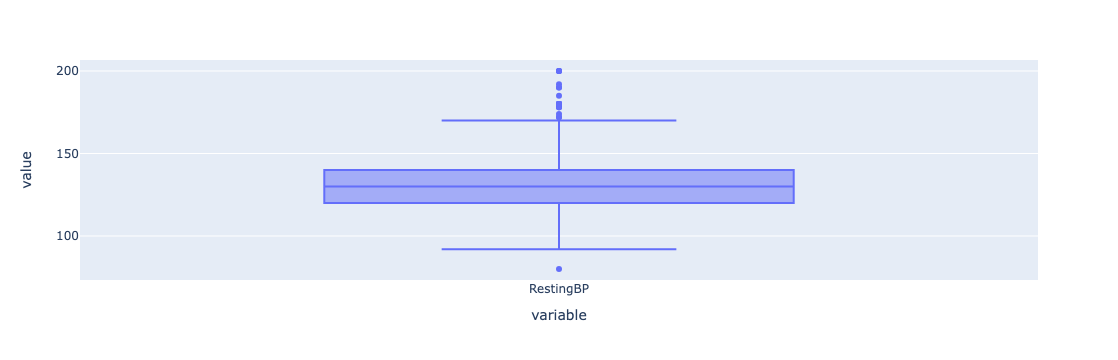

In [87]:
#Box plot for RestingBP 
px.box(df.RestingBP)

### 3.3  Addressing Zero Cholesterol Values

In [88]:
df[df['Cholesterol']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


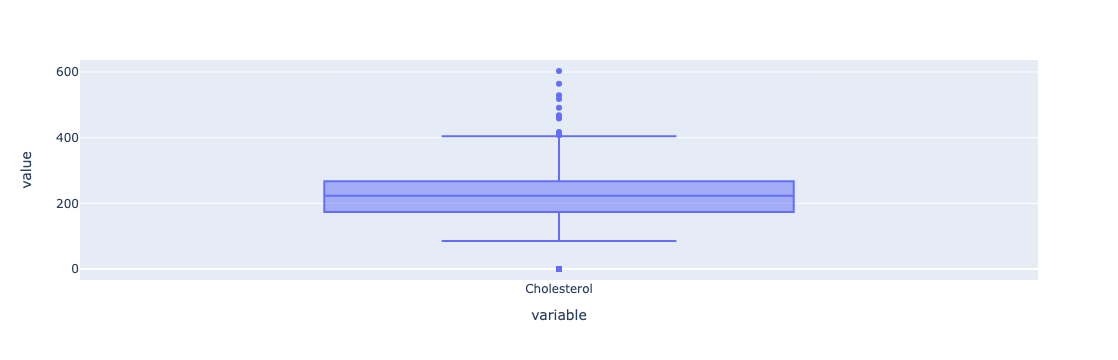

In [89]:
fig1 = px.box(df.Cholesterol)
fig1.show()

In [90]:
mean_value = df['Cholesterol'].mean()
df['Cholesterol'].replace(0, mean_value, inplace=True)
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,236.128459,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,56.231401,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,199.016358,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


 There are **171 rows** with Cholesterol values equal to **0**, which is practically not possible. Ignoring or deleting these rows is not feasible, as their quantity significantly affects the dataset.

Additionally, outliers have been observed. Therefore, these zero values are replaced by the **median Cholesterol value** of **223**.


### 4. Data Visulaization

### 4.1 Heart Disease Distribution

In [91]:
# 507 people have HeartDisease
print("The number of people without HeartDisease = ",df.HeartDisease.value_counts().get(0))
print("The number of people with HeartDisease = ",df.HeartDisease.value_counts().get(1))

The number of people without HeartDisease =  410
The number of people with HeartDisease =  507


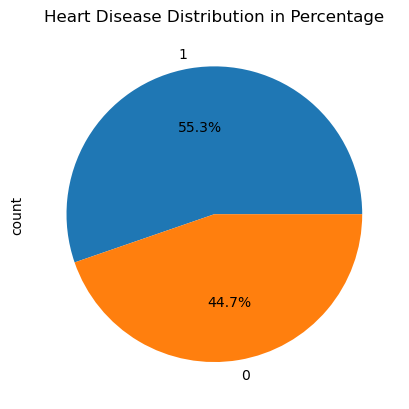

In [92]:
plt.title('Heart Disease Distribution in Percentage')
plt.ylabel(' ')
df['HeartDisease'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

### 4.2 Understading the correlation of data

In this section, we will explore the relationships between various features in the dataset. Understanding these correlations is crucial for identifying patterns and insights that can inform our analysis and predictions.

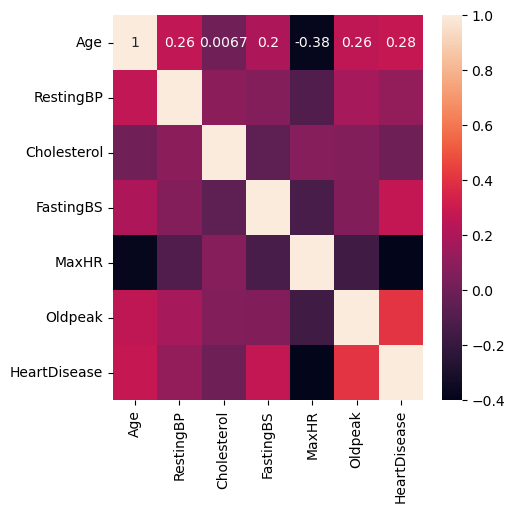

In [93]:
#Negative = opp direction and positive = same direction
#Darker shade = less correlation 
#Lighter shade = more correlation

plt.figure(figsize=(5,5))
x=df.corr(numeric_only=True)
sns.heatmap(x,annot=True)
plt.show()

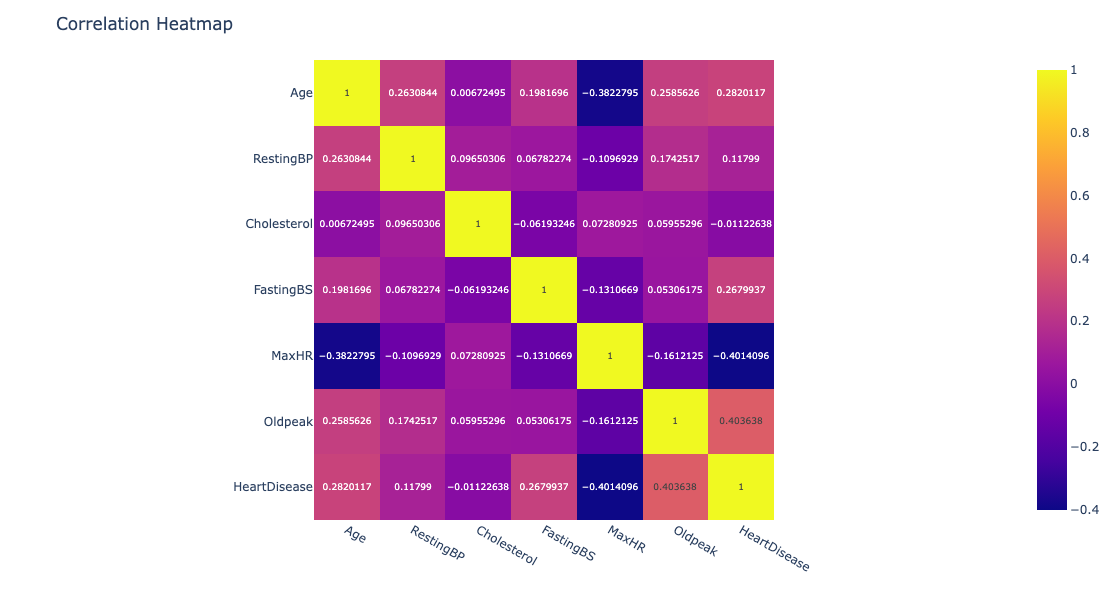

In [94]:
correlation_matrix = df.corr(numeric_only=True)

fig = px.imshow(correlation_matrix, text_auto=True)
fig.update_layout(title='Correlation Heatmap', width=800, height=600)

### 4.3 Age Factor

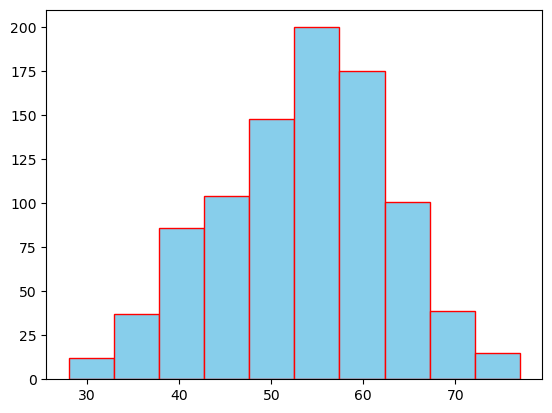

In [95]:
#Age ranges in this dataset

plt.hist(df.Age,bins=10,edgecolor='r',color='skyblue')
plt.show()

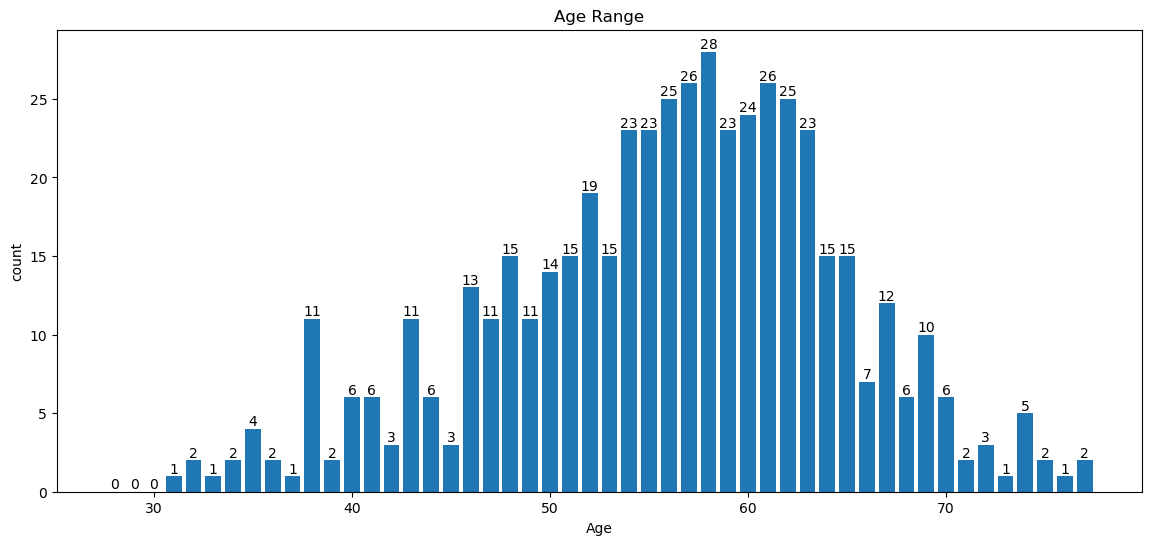

In [96]:
#Age ranges in this dataset with heartdisease

age_grouped = df.groupby('Age')['HeartDisease'].sum()

plt.figure(figsize=(14, 6))
bars = plt.bar(age_grouped.index, age_grouped.values)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, 
             height,
             f'{height}',
             ha='center',
             va='bottom'
)

plt.title("Age Range")
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

 #### *people between the age 50 to 60 are more prone to heart disease*

### 4.4 Sex Factor

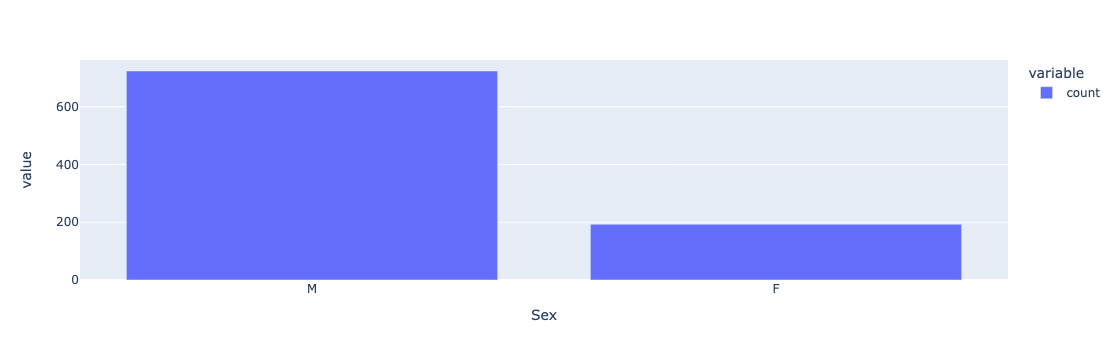

In [97]:
# Total number of Male and Female
px.bar(df.Sex.value_counts())

In [98]:
# Filtering only HeartDisease people
heart_disease_1 = df[df['HeartDisease'] == 1]

# Filtering HeartDisease people based on Gender
gender_counts = heart_disease_1['Sex'].value_counts()

# Extract counts for each gender
print("Number of Males with HeartDisease =",gender_counts.get('M'))
print("Number of Females with HeartDisease =",gender_counts.get('F'))

Number of Males with HeartDisease = 457
Number of Females with HeartDisease = 50


In [99]:
#Same as above using groupby
df.groupby('Sex')['HeartDisease'].value_counts()

Sex  HeartDisease
F    0               143
     1                50
M    1               457
     0               267
Name: count, dtype: int64

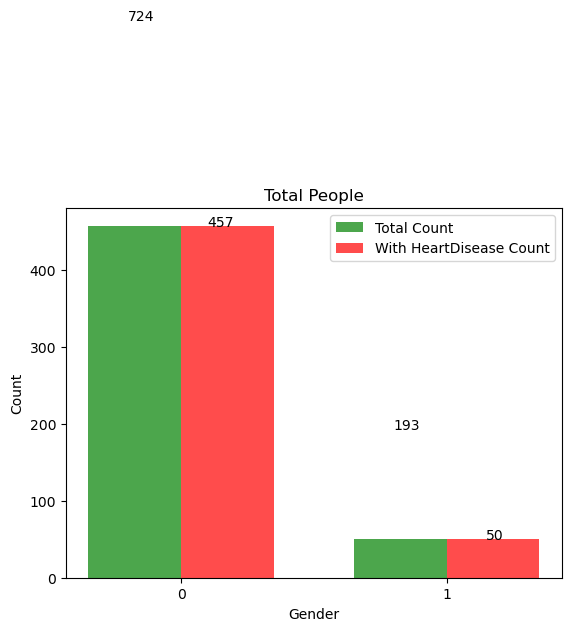

In [100]:
#Count of heart disease People
heart_disease_counts = df[df['HeartDisease'] == 1]['Sex'].value_counts()

x = np.arange(len(gender_counts))
bar_width = 0.35
opacity = 0.7

# Bar Chart for Count of Men and Women
plt.bar(x - bar_width/2, gender_counts, bar_width,alpha=opacity, color='g', label='Total Count')
# Bar Chart for Count of Men and Women with Heart Disease
plt.bar(x + bar_width/2, heart_disease_counts, bar_width,alpha=opacity, color='r', label='With HeartDisease Count')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Total People')
plt.xticks(x)
plt.legend()

plt.text(x=-0.2,y=df.Sex.value_counts()[0],s=df.Sex.value_counts()[0])
plt.text(x=0.1,y=heart_disease_counts[0],s=heart_disease_counts[0])

plt.text(x=0.8,y=df.Sex.value_counts()[1],s=df.Sex.value_counts()[1])
plt.text(x=1.15,y=heart_disease_counts[1],s=heart_disease_counts[1])
plt.show()

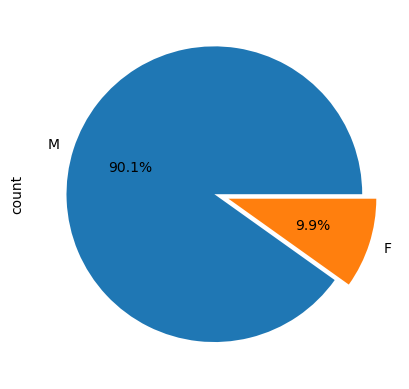

In [101]:
#Heart Disease Distribution in Percentage wrt to Sex ,M= Male, F=Female
heart_disease_1.Sex.value_counts().plot(kind='pie', explode=[0,0.1],autopct='%1.1f%%')
plt.show()

#### Heart Disease Prevalence by Gender

Out of **724 men**, **457** have heart disease, while among **193 women**, **50** have heart disease. This translates to:

- **49.8%** of men are prone to heart disease.
- **15.6%** of women are prone to heart disease.

From this analysis, it is evident that males are significantly more prone to heart disease compared to females.


### 4.5 ChestPain Factor

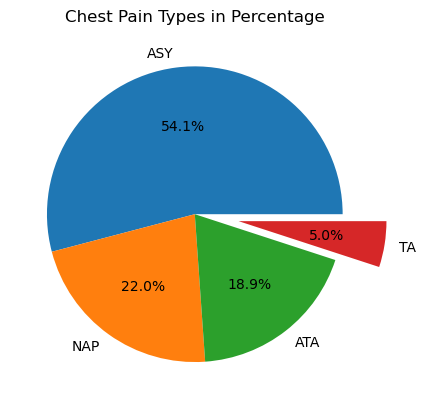

In [102]:
#Percentage of people with types of ChestPain, explained using a piechart

Q = df.ChestPainType.value_counts()
plt.pie(Q,labels=["ASY","NAP","ATA","TA"],autopct='%1.1f%%',explode=[0,0,0,0.3])
plt.title("Chest Pain Types in Percentage")
plt.show()

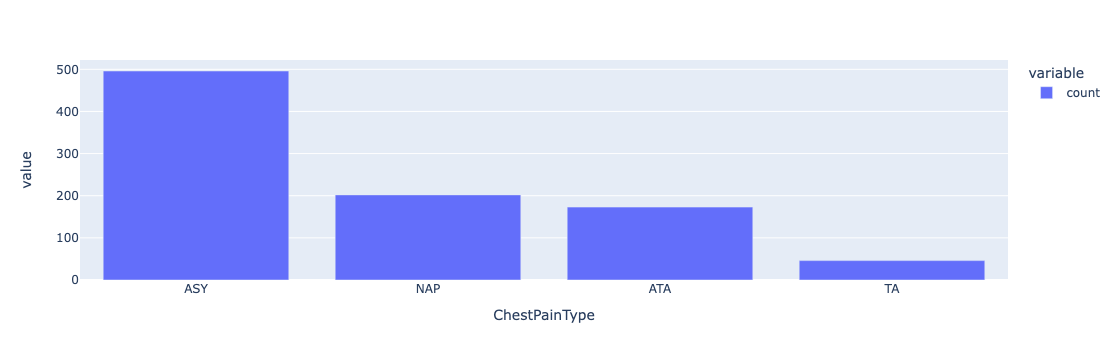

In [103]:
#Count of People with ChestPainType
px.bar(df.ChestPainType.value_counts())

In [104]:
# Ratio of male and female

pd.crosstab(index=df.Sex,columns=df.ChestPainType)

ChestPainType,ASY,ATA,NAP,TA
Sex,,,,
F,70,60,53,10
M,426,113,149,36


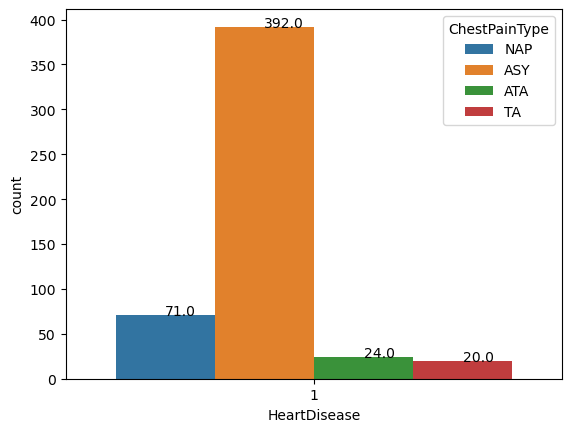

In [105]:
# People with ChestPainType who have HeartDisease

heart_disease_1 = df[df['HeartDisease'] == 1]
ax=sns.countplot(data = heart_disease_1,x='HeartDisease',hue='ChestPainType')

for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width() / 2, height, f'{height}')

Out of **507 heart patients**, the following conditions were identified:

- **71**: Non-Anginal Pain
- **392**: Asymptomatic
- **24**: Atypical Angina
- **20**: Typical Angina

The majority of heart patients will observe **asymptomatic** chest pain.


### 4.6 Resting BP Factor

Normal BP= 90/60 and 120/180, High BP= 130 and higher. 
Higher resting blood pressure is a known risk factor for heart disease. 
    
High BP= 130 to 139 = Hypertension stage I,This stage is associated with a higher risk of heart disease, especially if it persists.
BP higher than 140 =  Hypertension stage II, Individuals in this category are at a significantly increased risk of heart disease, 
                      including coronary artery disease, heart failure, and stroke.
BP higher than 180 = Hypertensive Crisis, This represents a medical emergency that can lead to severe cardiovascular complications,
                     including heart attack, stroke, and damage to other organs.

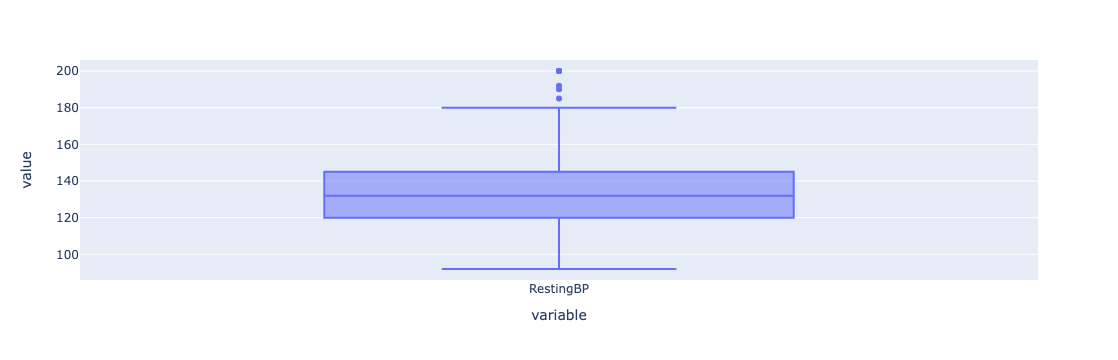

In [106]:
fig = px.box(heart_disease_1.RestingBP)
fig.show()

### * People with heart disease are observed to have more blood pressure*

### 4.7 Cholesterol Factor

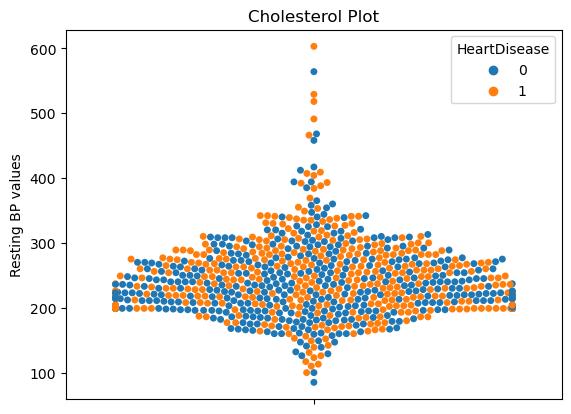

In [107]:
#Relationship between People with HeartDisease wrt to Cholesterol

sns.swarmplot(data=df, y='Cholesterol',hue='HeartDisease')
plt.title("Cholesterol Plot")
plt.ylabel("Resting BP values")

plt.show()

### 4.8 Fasting Blood sugar Factor

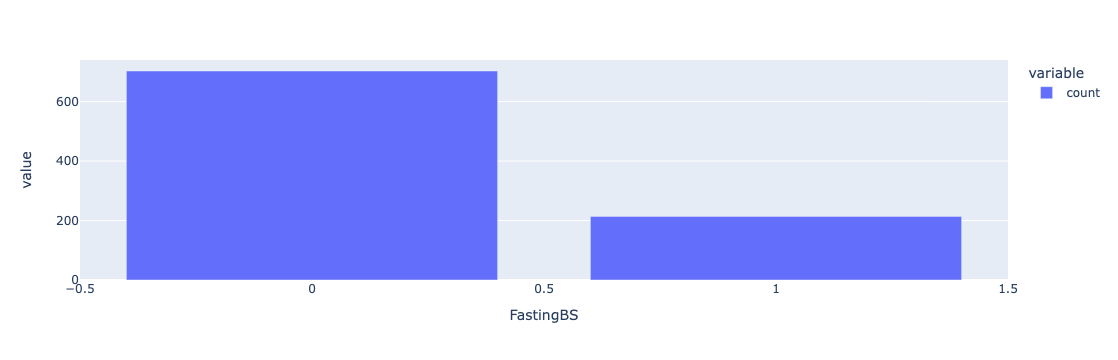

In [108]:
# Count of people with and without FastingBS 
px.bar(df.FastingBS.value_counts())

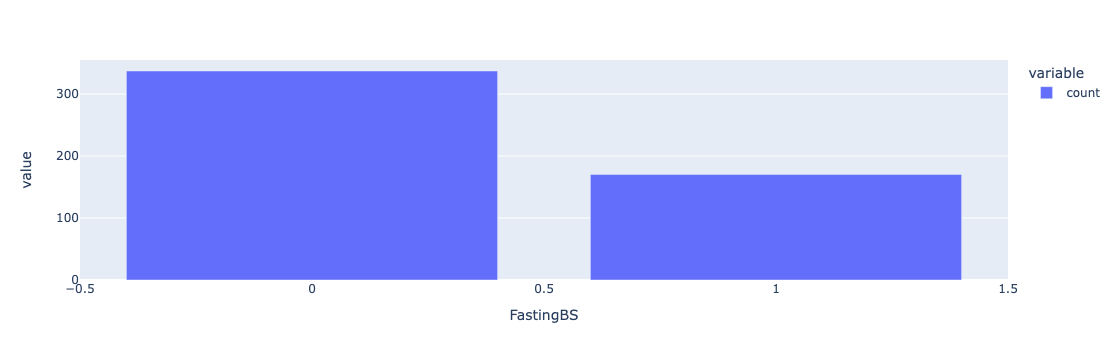

In [109]:
px.bar(heart_disease_1.FastingBS.value_counts())

<Axes: ylabel='count'>

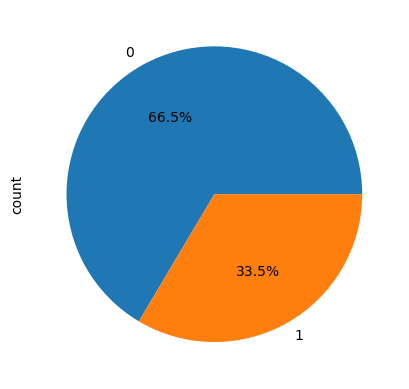

In [110]:
heart_disease_1.FastingBS.value_counts().plot(kind='pie',autopct="%1.1f%%")

AttributeError: 'numpy.int64' object has no attribute 'startswith'

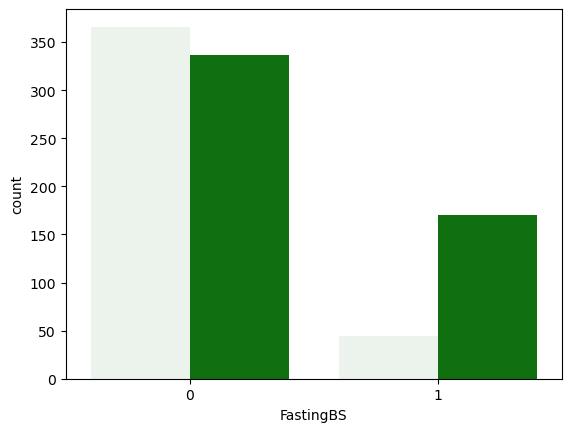

In [111]:
#Plot for the above data 

sns.countplot(data=df, x='FastingBS', hue='HeartDisease',color='g')
plt.title('Heart Disease Cases by Fasting Blood Sugar Level')
plt.xlabel('Fasting Blood Sugar (0 = normal, 1 = high)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
plt.title("Obseved Heart Disease in FastingBS patients")
plt.show()

### OBSERVATION : 
Individuals with diabetes i.e Fasting BS=1 often experience higher rates of heart disease due to factors like high BP levels, abnormal cholesterol levels.
 Individuals without diabetes i.e Fasting BS=0 have chances of heart disease too due to various other factors.

### 4.9 Resting ECG Factor

In [ ]:
# RestingECG Type and Count

ECG = df.RestingECG.value_counts()
plt.pie(ECG,labels=["Normal","LVH","ST"],autopct=lambda p: int(p * sum(ECG) / 100),explode=[0,0.2,0.1])
plt.show()

In [ ]:
#Heart disease patients with RestingECG Type and Count
px.bar(heart_disease_1.RestingECG.value_counts())

### OBSERVATION : A normal ECG typically indicates that there are no significant electrical abnormalities in the heart. 
This is reassuring but does not eliminate the risk of heart disease especially when risk symptoms or factors like BP,Cholesterol problems exist.

LVH and ST segment changes are important markers that suggest an increased risk of cardiovascular problems as seen from the plots above.
LVH = LVH refers to the thickening of the heart's left ventricle, often due to chronic pressure overload e.g., hypertension as seen in diff cases of BP.
ST = ST segment elevation or depression can indicate various issues, including reduced blood flow,tissue damage, or other cardiac stress.

### 4.10 MaxHR - Max HeartRate Factor

In [ ]:
sns.scatterplot(data=df,y='Age',x='MaxHR',hue='HeartDisease')

In [ ]:
sns.boxplot(x=df.HeartDisease,y=df.MaxHR)

### OBSERVATION : A higher maxHR is generally associated with better cardiovascular fitness. 
Individuals who are more physically active tend to have higher maxHR levels, which can help reduce the risk of heart disease.
Aged People with low Heart rates are more prone to HeartDiseases as seen from the above plot. 50+ aged with MaxHR < 130 

### 4.11 Exercise Angnia

In [ ]:
df.ExerciseAngina.value_counts()

In [ ]:
print(df.groupby('ExerciseAngina')['HeartDisease'].value_counts())

In [ ]:
#percentage distribution
df.groupby('ExerciseAngina')['HeartDisease'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.show()

In [ ]:
#count distribution
sns.countplot(data=df,x='ExerciseAngina',hue='HeartDisease')

### OBSERVATION :
Chest pain or discomfort that occurs during physical activity or exercise due to insufficient blood flow to the heart muscle is ExerciseAngnia.
It can be a significant indicator of underlying heart issues. 
As observed from the above chart if a person experiences ExerciseAngnia he has a greater risk in developing heartdisease.

### 4.12 Oldpeak Factor

In [ ]:
plt.hist(df.Oldpeak)

In [ ]:
sns.swarmplot(data=df,y='Oldpeak',hue='HeartDisease')
plt.show()

### OBSERVATION :
    ST_Slope of 0-1 indicates no heart disease and the other values indicates the presence of HeartDisease at different stages.
    This value is different for men and women

### 4.13 ST_Slope Factor

In [ ]:
px.bar(df.ST_Slope.value_counts())

In [ ]:
print(df.groupby('ST_Slope')['HeartDisease'].value_counts())

### OBSERVATION :
    It is observed that ST Slope of normal patients is UP Sloping.
    And ST Slope of heart patients is Flat.

### 4.14 Effect of Multiple factors (HIGH BP & Blood Sugar)

In [ ]:
#using user defined functions
def HighBP(x):
    if x['RestingBP']>140:
        return True

def Chol(y):
    if y['Cholesterol'] > 240:
        return True

In [ ]:
filtered_df2 = df[(df.apply(HighBP, axis=1))  & (df['FastingBS']==1)]
print(filtered_df2.HeartDisease.value_counts())
plt.pie(filtered_df2.HeartDisease.value_counts(),autopct="%1.1f%%",labels=['YES','NO'],explode=[0,0.1])
plt.show()

 ### *83% of People having high BP and have Fasting Blood Sugar are prone to heart disease*

### 4.15 Effect of Multiple factors (HIGH BP , Cholestrol & Exercise Angina)

In [ ]:
filtered_df3 = df[(df.apply(HighBP,axis=1)) & (df.apply(Chol,axis=1)) & (df['ExerciseAngina']=="Y")]
print(filtered_df3.HeartDisease.value_counts())
plt.pie(filtered_df3.HeartDisease.value_counts(),autopct="%1.1f%%",labels=['YES','NO'],explode=[0,0.2])
plt.show()

 #### *92.9% of People having high BP and have Fasting Blood Sugar are prone to heart disease*

### 4.16 Effect of Multiple factors (HIGH BP , Cholestrol & Resting ECG)

In [ ]:
filtered_df4 = df[(df.apply(HighBP,axis=1)) & (df.apply(Chol,axis=1)) & (df['RestingECG'].isin(['LVH','ST']))]
print(filtered_df4.HeartDisease.value_counts())
plt.pie(filtered_df4.HeartDisease.value_counts(),autopct="%1.1f%%",labels=['YES','NO'],explode=[0,0.2])
plt.show()

#### *80% of People having high BP, Cholestrol and ubnormal ECG are prone to heart disease*

### 4.16 Effect of Multiple factors (Age, MaxHR, ExerciseAngina & Resting ECG)¶

In [ ]:
filtered_df5 = df[( (df['Age'] > 50) & df['MaxHR'] < 130) & (df['ExerciseAngina']=="Y") & (df['RestingECG'].isin(['LVH','ST']))]
print(filtered_df5.HeartDisease.value_counts())
plt.pie(filtered_df5.HeartDisease.value_counts(),autopct="%1.1f%%",labels=['YES','NO'],explode=[0,0.2])
plt.show()

#### *86.6% of elderly people having low MaxHR, experience experience Angina and ubnormal ECG are prone to heart disease*

### 4.17 Effect of Multiple factors (St Slope, Age, Resting ECG)¶

In [ ]:
filtered_df6 = df[(df['ST_Slope']=='Flat') & (df['Age'] > 50) & (df['RestingECG'].isin(['LVH','ST']))]
print(filtered_df6.HeartDisease.value_counts())
plt.pie(filtered_df6.HeartDisease.value_counts(),autopct="%1.1f%%",labels=['YES','NO'],explode=[0,0.2])
plt.show()

#### *83.2% of elderly people having ubnormal ECG  and St slope values are Flat prone to heart disease*

In [ ]:
#Multivariate analysis using pairplot

sns.pairplot(data=df,hue='HeartDisease',corner=True)
plt.show()